Run the following code to print the difference between root mean squared errors of the two models, in both the train sample and in the test sample.

In [7]:
#pip install sklearn

In [8]:
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Webscraping

Create list of $n$ web pages which will be scraped

In [9]:
preurl = "https://www.cars.com/shopping/results/?"
posturl = "&page_size=20&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=mercedes_benz&maximum_distance=all&mileage_max=60000&models[]=mercedes_benz-amg_gt_53&models[]=mercedes_benz-amg_gt_63&models[]=mercedes_benz-amg_s&models[]=mercedes_benz-amg_s_63&models[]=mercedes_benz-amg_s_65&models[]=mercedes_benz-maybach_gls_600&models[]=mercedes_benz-maybach_s&models[]=mercedes_benz-maybach_s_550&models[]=mercedes_benz-maybach_s_560&models[]=mercedes_benz-maybach_s_580&models[]=mercedes_benz-maybach_s_650&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=85281"

url_list = []

n = 15
for i in range(n):
    url = preurl + "page=" + str(i+1) + posturl
    url_list.append(url)

Creates 3 lists: one for the name of the car, mileage and price. For each list, the corresponding text is recorded from particular html tags. HTML tags are selected for parsing the BeautifulSoup object created from the list of URLs.

In [10]:
cars = []
miles = []
price = []

for i in range(n):
    #print('working on page'+str(i+1))
    page = requests.get(url_list[i])
    soup = BeautifulSoup(page.content, 'html.parser')
    
    car_tags = soup.find_all('h2', attrs={'class': 'title'})
    miles_tags = soup.find_all('div', attrs={'class': 'mileage'})
    price_tags = soup.find_all('span', attrs={'class': 'primary-price'})
    
    for j in range(len(car_tags)):
        cars.append(car_tags[j].get_text())
        miles.append(miles_tags[j].get_text())
        price.append(price_tags[j].get_text())

Rearranges the order of the colums and EXPORTs new dataframe to csv

In [11]:
df = pd.DataFrame({'Car': cars, 'Mileage': miles, 'Price': price})

df.to_csv('mycars-raw.csv', header=True, index=False)

len(df)

300

# Data Wrangling

In [12]:
rawdf = pd.read_csv('mycars-raw.csv')

Creates a copy of the dataframe, removes string characters from numeric features, creates a new column based on existing column value, removes redundant information from $car$ column

In [13]:
rawdf.head(5)
df = rawdf
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)
df['Mileage'] = df['Mileage'].replace({',': '', 'mi.': ''}, regex=True)
df['Year'] = [int(df['Car'][i][:4]) for i in range(len(df))]
df['Car'] = [df['Car'][i][19:] for i in range(len(df))]
df

,Car,Mileage,Price,Year
0,AMG S 63 Base 4MATIC,19211,123500,2018
1,AMG S 63 Base 4MATIC,27167,127848,2018
2,AMG S AMG S 63 4MATIC,48098,83990,2016
3,AMG S AMG S 63 4MATIC,27675,81990,2016
4,AMG GT 53 Base,3097,115999,2021
...,...,...,...,...
295,Maybach GLS 600 4MATIC,1310,261991,2021
296,AMG S 63 Base 4MATIC,35385,117389,2017
297,AMG S 63 Base 4MATIC,12779,129923,2019
298,AMG GT 63 S 4-Door,1501,173900,2021


In [65]:
df = pd.DataFrame({'Car': df['Car'], 'Year': df['Year'], 'Mileage': df['Mileage'], 'Price': df['Price']})

In [66]:
df['Price'][44] = 'Not Priced'
df['Price'][54] = 'Not Priced'
df['Price'][154] = 'Not Priced'

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate f

In [67]:
nopricedf = df[df.Price.str.contains('Not')]
cleandf = df[~df.Price.str.contains('Not')]

In [68]:
print(len(df), len(nopricedf), len(cleandf))
cleandf

300 3 297


,Car,Year,Mileage,Price
0,AMG S 63 Base 4MATIC,2018,19211,123500
1,AMG S 63 Base 4MATIC,2018,27167,127848
2,AMG S AMG S 63 4MATIC,2016,48098,83990
3,AMG S AMG S 63 4MATIC,2016,27675,81990
4,AMG GT 53 Base,2021,3097,115999
...,...,...,...,...
295,Maybach GLS 600 4MATIC,2021,1310,261991
296,AMG S 63 Base 4MATIC,2017,35385,117389
297,AMG S 63 Base 4MATIC,2019,12779,129923
298,AMG GT 63 S 4-Door,2021,1501,173900


In [69]:
cleandf[['Year', 'Mileage', 'Price']] = cleandf[['Year', 'Mileage', 'Price']].apply(pd.to_numeric)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [70]:
[print(type(cleandf.iloc[0, i])) for i in range(0,4)]

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


[None, None, None, None]

In [71]:
X = cleandf[['Year', 'Mileage']].to_numpy()


In [72]:
y = cleandf['Price'].values

print(X[0:5], '\n', y[0:5].reshape(-1,1), '\n', X.shape, '\n', y.shape)


[[ 2018 19211]
 [ 2018 27167]
 [ 2016 48098]
 [ 2016 27675]
 [ 2021  3097]] 
 [[123500]
 [127848]
 [ 83990]
 [ 81990]
 [115999]] 
 (297, 2) 
 (297,)


# Preliminary Data Exploration

Text(0, 0.5, 'Price')

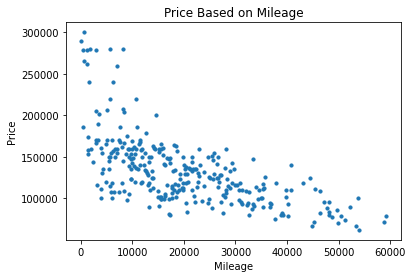

In [73]:
plt.scatter(X[:,1], y, s=10)
plt.title('Price Based on Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')

In [74]:
x = X[:,1]
x.shape = (len(x), 1)

In [75]:
mod0 = LinearRegression().fit(x,y)
b = (mod0.intercept_, mod0.coef_)
b

(174616.88328972287, array([-2.05552884]))

# Simple Linear Regression Modeling

## Model 0

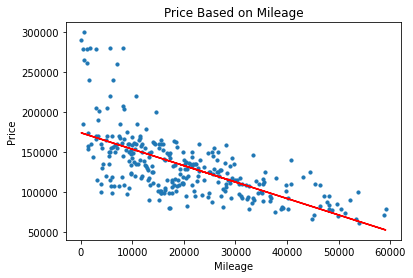

In [76]:
yhat = mod0.predict(x)
plt.scatter(X[:,1], y, s=10)
plt.title('Price Based on Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.plot(x, yhat, color='red')

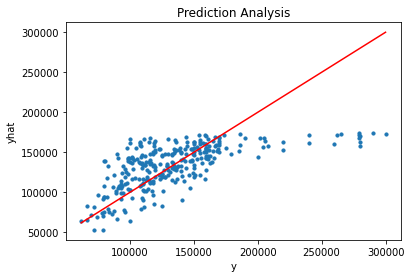

In [77]:
c = pd.DataFrame({'y': y, 'yhat': yhat})
c['yhat'] = [round(i) for i in c['yhat']]
c = c.sort_values(['y'])

plt.scatter(y, yhat, s=10)
plt.title('Prediction Analysis')
plt.xlabel('y')
plt.ylabel('yhat')
plt.plot(c['y'], c['y'], color='red')

## Model 1

In [78]:
x1train, x1test, y1train, y1test = train_test_split(x,y, random_state=123, test_size=0.25)

mod1 = LinearRegression()
mod1.fit(x1train, y1train)

mod1.intercept_, mod1.coef_

(174239.97202385872, array([-2.06765297]))

In [79]:
y1train_hat = mod1.predict(x1train)
y1test_hat = mod1.predict(x1test)

rmse1_train = np.sqrt(np.mean(np.power((y1train_hat-y1train), 2)))
rmse1_test = np.sqrt(np.mean(np.power((y1test_hat-y1test), 2)))

print('RMSE1_train:', round(rmse1_train, 2), '\n',
     'RMSE1_test:', round(rmse1_test, 2))

RMSE1_train: 32779.81 
 RMSE1_test: 31656.85


## Model 2

In [81]:
from datetime import date


In [93]:
x2 = pd.DataFrame({'Age': date.today().year - cleandf['Year'], 'Mileage': cleandf['Mileage'], 'SQMileage': np.power(cleandf['Mileage'], 2), 'Price': cleandf['Price']})
x2 = x2.to_numpy()

x2[0:5,:]

array([[         3,      19211,  369062521,     123500],
       [         3,      27167,  738045889,     127848],
       [         5,      48098, 2313417604,      83990],
       [         5,      27675,  765905625,      81990],
       [         0,       3097,    9591409,     115999]])

In [96]:
x2train, x2test, y2train, y2test = train_test_split(x2[:,0:3], x2[:,3], random_state=123, test_size=0.25)

mod2 = LinearRegression()
mod2.fit(x2train, y2train)

mod2.intercept_, mod2.coef_

(206129.50755323883,
 array([-1.28050886e+04, -3.01305273e+00,  3.51559603e-05]))

In [97]:
y2train_hat = mod2.predict(x2train)
y2test_hat = mod2.predict(x2test)

rmse2_train = np.sqrt(np.mean(np.power(y2train_hat - y2train, 2)))
rmse2_test = np.sqrt(np.mean(np.power(y2test_hat - y2test, 2)))

print('RMSE2_train:', round(rmse2_train, 2), '\n'
      'RMSE2_test:', round(rmse2_test, 2))

RMSE2_train: 27198.22 
RMSE2_test: 26632.93


Text(0, 0.5, 'y2_hat')

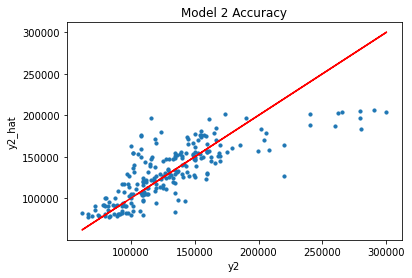

In [102]:
plt.scatter(y2train, y2train_hat, s=10)
plt.plot(y2train, y2train, color='r')
plt.title('Model 2 Accuracy')
plt.xlabel('y2')
plt.ylabel('y2_hat')

In [108]:
print('rmse1_train, rmse2_train:', np.round([rmse1_train, rmse2_train], 2))
print('rmse1_test, rmse2_test: ', np.round([rmse1_test, rmse2_test], 2))

rmse1_train, rmse2_train: [32779.81 27198.22]
rmse1_test, rmse2_test:  [31656.85 26632.93]
